In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")
police_killings.head(20)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79,15523,20833.0,53596,0.388704,1.0,1.0,58,0.073651,0.102955
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,...,44.2,25949,58068.0,48552,1.195996,4.0,4.0,17.2,0.131461,0.203801
7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,...,84.1,25043,66543.0,55909,1.190202,4.0,4.0,12.2,0.094347,0.090438
8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,...,66.3,16778,30391.0,38310,0.793292,2.0,1.0,37.7,0.140833,0.047601
9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,...,26.5,22005,44553.0,51667,0.862311,3.0,2.0,18.4,0.174167,0.102692


In [15]:
counts = police_killings["raceethnicity"].value_counts()
numOfCount = 0
print(counts[0])
for item in counts:
    numOfCount += 1
print(numOfCount)
    

236
6


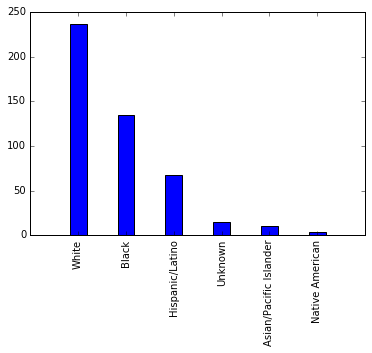

In [30]:
plt.bar(range(numOfCount), counts, width=0.35, align="center")
plt.xticks(range(numOfCount), counts.index, rotation=90)
plt.show()

([<matplotlib.axis.XTick at 0x119861ba8>,
 <a list of 6 Text xticklabel objects>)

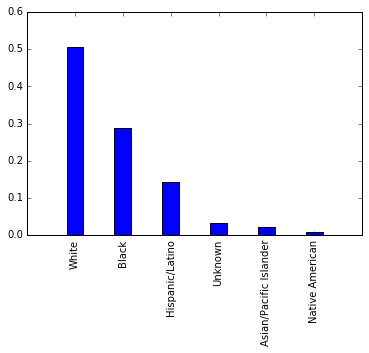

In [31]:
percentage = counts / sum(counts)
plt.bar(range(6), percentage, width=0.35, align="center")
plt.xticks(range(6), counts.index, rotation=90)

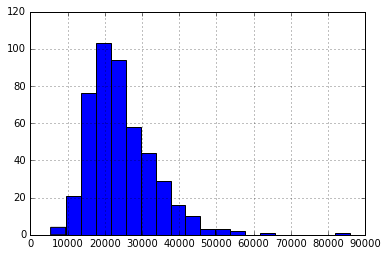

In [32]:
income = police_killings["p_income"][police_killings["p_income"] != "-"]
income.astype(float).hist(bins=20)

In [34]:
state_pop = pd.read_csv("state_population.csv")
state_pop.head(3)


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8


In [35]:
counts = police_killings["state_fp"].value_counts()
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states = states.merge(state_pop, on="STATE")

states["pop_millions"] = state_pop["POPESTIMATE2015"] / 1000000
states["rate"] = states["pop_millions"] / states["shootings"]
states.sort_values(["rate"])

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
2,12,29,40,3,5,Florida,20271272,16166143,79.7,0.738432,0.025463
9,53,11,40,4,9,Washington,7170351,5558509,77.5,0.672228,0.061112
8,34,11,40,1,2,New Jersey,8958013,6959192,77.7,0.945934,0.085994
1,48,47,40,3,7,Texas,27469114,20257343,73.7,4.858979,0.103383
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,2.978204,0.135373
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,1.431603,0.143160
13,29,10,40,2,4,Missouri,6083672,4692196,77.1,1.654930,0.165493
20,18,8,40,2,3,Indiana,6619680,5040224,76.1,1.329328,0.166166
27,31,6,40,2,4,Nebraska,1896190,1425853,75.2,1.032949,0.172158
35,5,4,40,3,7,Arkansas,2978204,2272904,76.3,0.756927,0.189232


In [38]:
pk = police_killings[
    (police_killings["share_white"] != "-") &
    (police_killings["share_black"] != "-") &
    (police_killings["share_hispanic"] != "-")
]
pk[["share_white", "share_black", "share_hispanic"]].astype(float)
pk

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79,15523,20833.0,53596,0.388704,1.0,1.0,58,0.073651,0.102955
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,...,44.2,25949,58068.0,48552,1.195996,4.0,4.0,17.2,0.131461,0.203801
7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,...,84.1,25043,66543.0,55909,1.190202,4.0,4.0,12.2,0.094347,0.090438
8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,...,66.3,16778,30391.0,38310,0.793292,2.0,1.0,37.7,0.140833,0.047601
9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,...,26.5,22005,44553.0,51667,0.862311,3.0,2.0,18.4,0.174167,0.102692


In [44]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

In [45]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop               4201.660714
county_income    54830.839286
dtype: float64

In [46]:
hs[columns].mean()

pop               4315.750000
county_income    48706.967391
dtype: float64